<a href="https://colab.research.google.com/github/xmuhammadaziz09/deeplearning_hyperparameter/blob/main/Tugas2_HYPERPARAMETER_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install keras_preprocessing

In [55]:
from google.colab import drive
import os
from PIL import Image

drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Dataset_parfum'  # Pastikan path benar

# Dapatkan daftar kelas (subfolder)
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Daftar ekstensi yang didukung
supported_extensions = ['.jpg', '.jpeg', '.png', '.webp', '.JPG', '.JPEG']

# Cek gambar corrupt & format tidak didukung
corrupt_images = []
unsupported_files = []

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)

        # Cek ekstensi file
        ext = os.path.splitext(img_name)[1]
        if ext not in supported_extensions:
            unsupported_files.append(img_path)
            continue

        # Cek gambar corrupt
        try:
            with Image.open(img_path) as img:
                img.convert('RGB')  # Coba convert ke RGB
        except:
            corrupt_images.append(img_path)

print(f"File tidak didukung: {len(unsupported_files)} (contoh: {unsupported_files[:3]})")
print(f"Gambar corrupt: {len(corrupt_images)} (contoh: {corrupt_images[:3]})")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File tidak didukung: 0 (contoh: [])
Gambar corrupt: 0 (contoh: [])


In [56]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing dan pembagian dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1  # 10% untuk validation, sisanya train
)

train_flow = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset_parfum',  # Ganti dengan path dataset kamu
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_flow = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset_parfum',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# Ambil jumlah kelas dari dataset
num_classes = len(train_flow.class_indices)

# Load ResNet50 sebagai base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Bekukan layer awal

# Tambahkan layer kustom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Bangun model akhir
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan arsitektur
model.summary()


Found 1096 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_12[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,113,284 (91.98 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [57]:
BATCH_SIZE = 64
TARGET_SIZE = (224, 224)
dataset = "/content/drive/MyDrive/Dataset_Topi"

<ipython-input-58-f85297213e96>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_labels.index, y=top_labels.values, alpha=0.8, palette='dark:salmon_r')


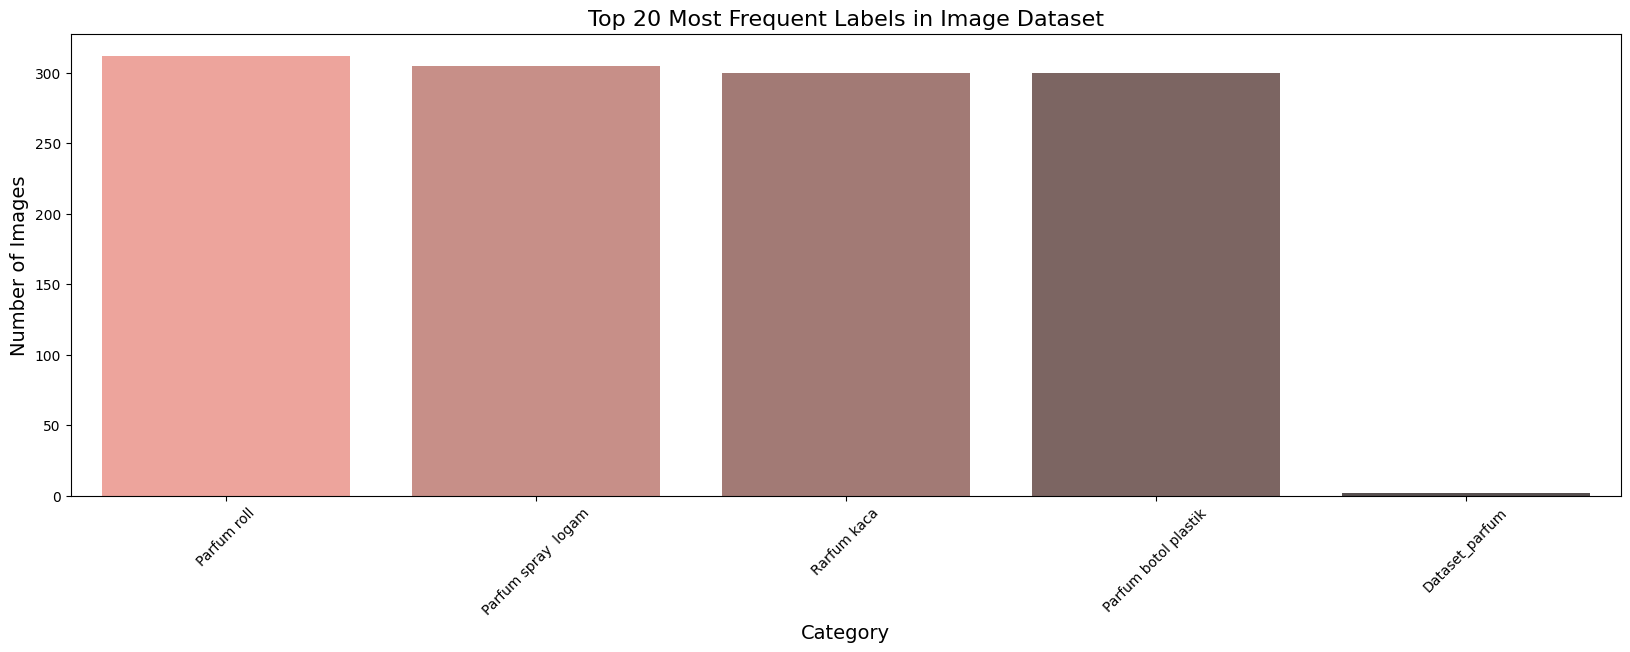

4 folder, 2 file di direktori: /content/drive/MyDrive/Dataset_parfum
0 folder, 300 file di direktori: /content/drive/MyDrive/Dataset_parfum/Rarfum kaca
0 folder, 305 file di direktori: /content/drive/MyDrive/Dataset_parfum/Parfum spray  logam
0 folder, 300 file di direktori: /content/drive/MyDrive/Dataset_parfum/Parfum botol plastik
0 folder, 312 file di direktori: /content/drive/MyDrive/Dataset_parfum/Parfum roll


In [58]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path ke dataset
dataset = '/content/drive/MyDrive/Dataset_parfum'
image_folder = Path(dataset)

# Ambil semua path gambar
image_paths = list(image_folder.glob('**/*.JPG')) + list(image_folder.glob('**/*.jpg')) + \
              list(image_folder.glob('**/*.PNG')) + list(image_folder.glob('**/*.png'))

# Ubah semua ekstensi file menjadi .jpg
for i, path in enumerate(image_paths):
    new_path = path.with_suffix('.jpg')
    if path != new_path:
        path.rename(new_path)
        image_paths[i] = new_path  # update path dalam list

# Ekstrak nama folder sebagai label
image_labels = list(map(lambda path: os.path.split(os.path.split(path)[0])[1], image_paths))

# Gabungkan ke DataFrame
image_paths_series = pd.Series(image_paths, name='ImagePath').astype(str)
label_series = pd.Series(image_labels, name='Category')
df_images = pd.concat([image_paths_series, label_series], axis=1)

# Visualisasi top 20 label
top_labels = df_images['Category'].value_counts().head(20)
plt.figure(figsize=(20, 6))
sns.barplot(x=top_labels.index, y=top_labels.values, alpha=0.8, palette='dark:salmon_r')
plt.title('Top 20 Most Frequent Labels in Image Dataset', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Menampilkan struktur folder
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"{len(dirnames)} folder, {len(filenames)} file di direktori: {dirpath}")

walk_through_dir(dataset)


<ipython-input-59-587b1628be1e>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.sample(1).reset_index(drop=True))


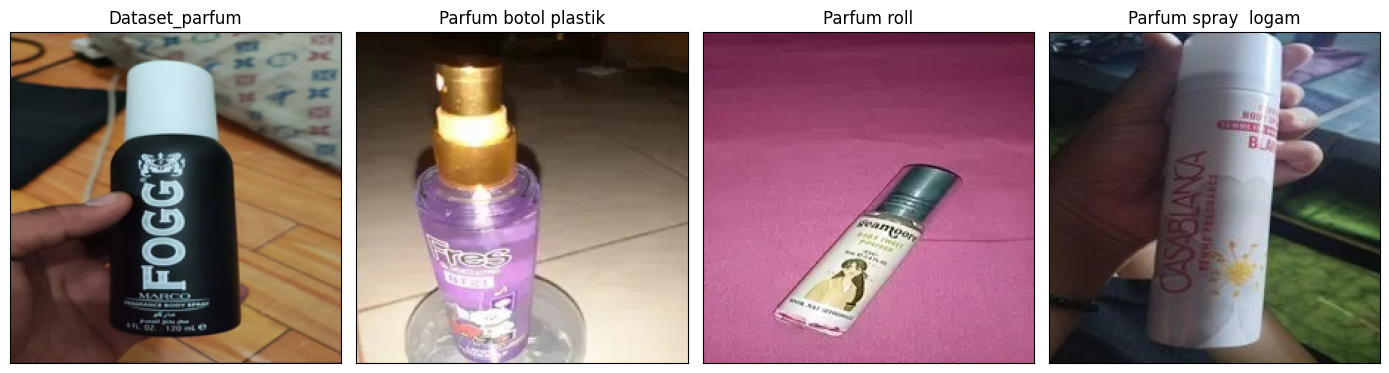

In [59]:
from PIL import Image

# Ambil satu gambar acak dari setiap kategori
sampled_images = (
    df_images.groupby('Category', group_keys=False)
    .apply(lambda group: group.sample(1).reset_index(drop=True))
    .reset_index(drop=True)
)

# Tentukan jumlah gambar yang ingin ditampilkan (maksimal 8)
num_samples = min(len(sampled_images), 8)

# Setup grid untuk plotting
rows, cols = 1, 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 7), subplot_kw={'xticks': [], 'yticks': []})

# Flatten axes dan tampilkan hanya sebanyak `num_samples` gambar
for idx, ax in enumerate(axes.flat[:num_samples]):
    image_path = sampled_images.ImagePath[idx]
    category = sampled_images.Category[idx]

    image = Image.open(image_path)
    image_square = image.resize((224, 224))
    ax.imshow(image_square)
    ax.set_title(category)

# Sembunyikan subplot kosong jika gambar < subplot
for ax in axes.flat[num_samples:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


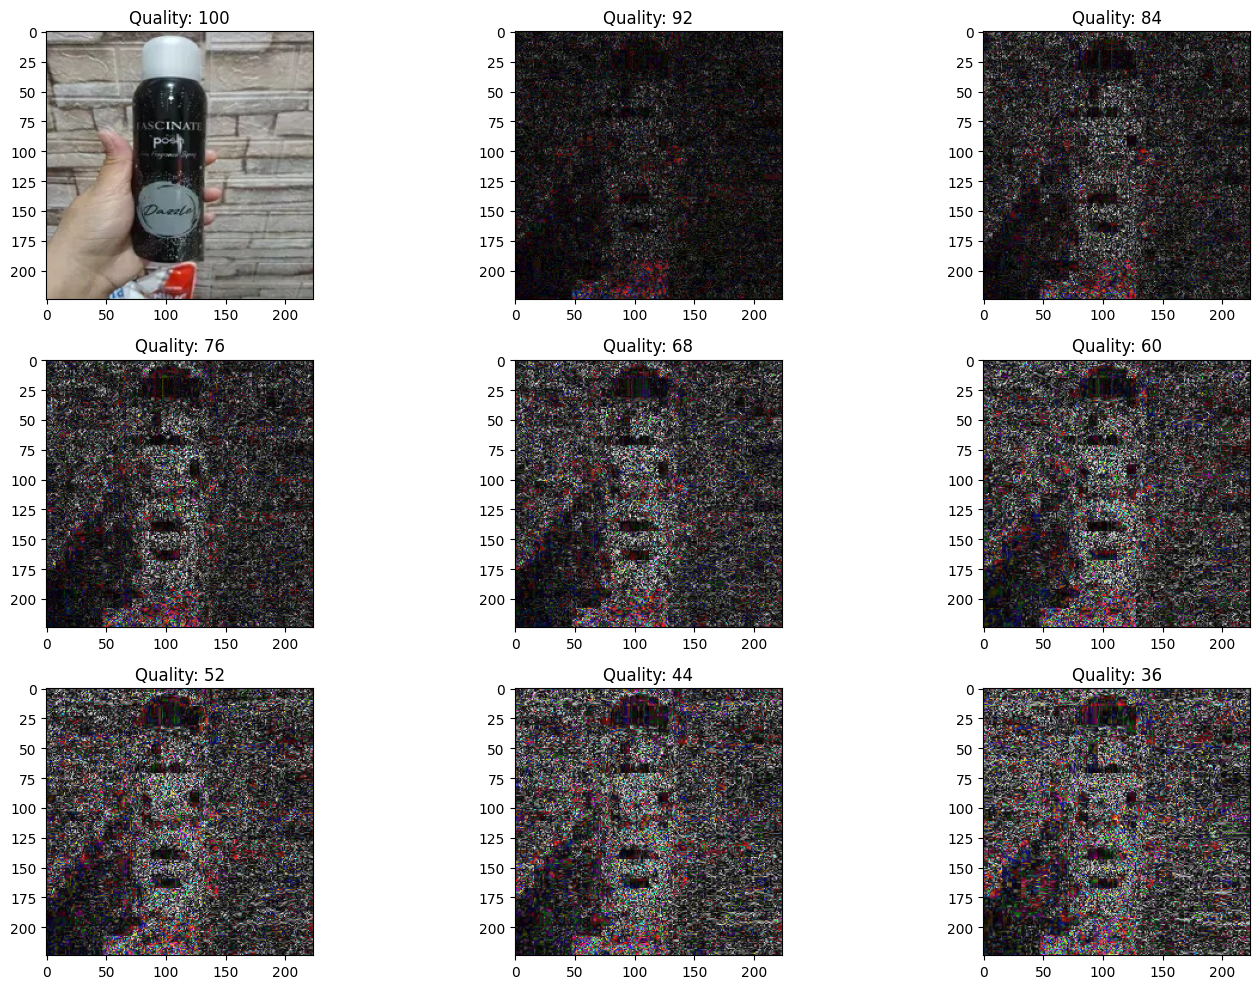

In [60]:
def compute_ela_cv(image_path, compression_quality):
    temp_file = 'temp_file_name.jpeg'
    SCALE_FACTOR = 15
    original = cv2.imread(image_path)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    # Simpan ulang gambar dengan tingkat kompresi tertentu
    cv2.imwrite(temp_file, original, [cv2.IMWRITE_JPEG_QUALITY, compression_quality])

    # Baca kembali gambar yang sudah dikompresi
    compressed = cv2.imread(temp_file)

    # Hitung perbedaan absolut lalu perbesar nilainya dengan skala
    difference = SCALE_FACTOR * cv2.absdiff(original, compressed)
    return difference


def convert_to_ela_image(image_path, compression_quality):
    temp_jpeg = 'temp_file_name.jpeg'
    temp_ela = 'temp_ela.png'
    original_image = Image.open(image_path).convert('RGB')
    original_image.save(temp_jpeg, 'JPEG', quality=compression_quality)
    recompressed_image = Image.open(temp_jpeg)

    # Hitung selisih piksel antar gambar asli dan hasil kompresi
    ela_result = ImageChops.difference(original_image, recompressed_image)

    max_values = ela_result.getextrema()
    highest_diff = max([val[1] for val in max_values])
    if highest_diff == 0:
        highest_diff = 1

    scale_factor = 255.0 / highest_diff
    ela_result = ImageEnhance.Brightness(ela_result).enhance(scale_factor)

    return ela_result


def select_random_image(folder_path, ext=None):
    # Ambil satu file gambar secara acak dari folder tertentu
    if ext:
        files = Path(folder_path).glob(f'*.{ext}')
    else:
        files = Path(folder_path).glob('*')

    files = list(files)
    selected = random.choice(image_paths)
    return selected.as_posix()


# Ambil satu contoh gambar dari kategori tertentu dan proses menggunakan ELA
selected_class = 'Parfum kaca'
base_path = '/content/drive/MyDrive/Dataset_parfum'
image_path = select_random_image(f'{base_path}/{selected_class}')
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB) / 255.0

# Nilai awal kompresi dan pengaturan grid
start_quality = 100
cols, rows = 3, 3

# Buat plot grid untuk menampilkan hasil
fig = plt.figure(figsize=(15, 10))

for index in range(1, cols * rows + 1):
    compression = start_quality - (index - 1) * 8  # Kurangi kualitas secara bertahap
    ela_output = compute_ela_cv(image_path=image_path, compression_quality=compression)

    if index == 1:
        ela_output = original_img.copy()  # Tampilkan gambar asli di posisi pertama

    resized_img = cv2.resize(ela_output, (224, 224))

    # Tambahkan gambar ke subplot grid
    axis = fig.add_subplot(rows, cols, index)
    axis.title.set_text(f'Quality: {compression}')
    plt.imshow(resized_img)

plt.tight_layout()
plt.show()


In [61]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 sebagai base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Bekukan layer awal

# Tambahkan layer kustom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(len(train_flow.class_indices), activation='softmax')(x)

# Bangun model akhir
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan arsitektur
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_13[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,586,948 (9.87 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [62]:
import tensorflow as tf
from tensorflow.keras import layers

# Augmentasi Data
augment = tf.keras.Sequential([
    layers.Resizing(224, 224),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])


In [63]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 sebagai base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Bekukan layer awal

# Tambahkan layer kustom untuk klasifikasi
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(len(train_flow.class_indices), activation='softmax')(x)

# Bangun model akhir
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan arsitektur
model.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,586,948 (9.87 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [64]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import datetime

# Memuat model ResNet50 yang telah dilatih sebelumnya tanpa lapisan output (fully connected layer)
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Buat callback untuk menyimpan bobot model terbaik
checkpoint_path = "model_parfum.weights.h5"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor="val_accuracy",
    save_best_only=True
)

# Callback untuk menghentikan pelatihan jika val_loss tidak membaik
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Callback untuk mengurangi learning rate jika val_loss stagnan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.001e-6
)

# Bangun model menggunakan ResNet50 yang telah dimuat sebelumnya
inputs = pretrained_model.input
x = augment(inputs)  # augment dari pipeline augmentasi

from tensorflow.keras.layers import GlobalAveragePooling2D

x = pretrained_model.output
x = GlobalAveragePooling2D()(x)  # <- ubah shape dari (7,7,2048) menjadi (2048)
x = Dense(64, activation='relu')(x)

x = Dropout(0.6)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.45)(x)

outputs = Dense(len(train_flow.class_indices), activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fungsi membuat callback TensorBoard
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = os.path.join(dir_name, experiment_name, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return TensorBoard(log_dir=log_dir)

# Melatih model
history = model.fit(
    train_flow,
    steps_per_epoch=len(train_flow),
    validation_data=val_flow,
    validation_steps=len(val_flow),
    epochs=10,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", "model_parfum"),
        checkpoint_callback,
        reduce_lr
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.2475 - loss: 1.5617 - val_accuracy: 0.2479 - val_loss: 1.4272 - learning_rate: 5.0000e-05
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 607ms/step - accuracy: 0.4575 - loss: 1.1889 - val_accuracy: 0.2479 - val_loss: 1.4582 - learning_rate: 5.0000e-05
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 648ms/step - accuracy: 0.5889 - loss: 0.9712 - val_accuracy: 0.2479 - val_loss: 1.4196 - learning_rate: 5.0000e-05
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 624ms/step - accuracy: 0.6915 - loss: 0.7946 - val_accuracy: 0.2479 - val_loss: 1.5735 - learning_rate: 5.0000e-05
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 575ms/step - accuracy: 0.8033 - loss: 0.5688 - val_accuracy: 0.2479 - val_loss: 1.7146 - learning_rate: 5.0000e-05
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 658ms/step - accuracy: 0.8754 - loss: 0.4305 - val_accuracy: 0.2893 - val_loss: 1.5696 - learning_rate: 5.0000e-05
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 749ms/step - accur

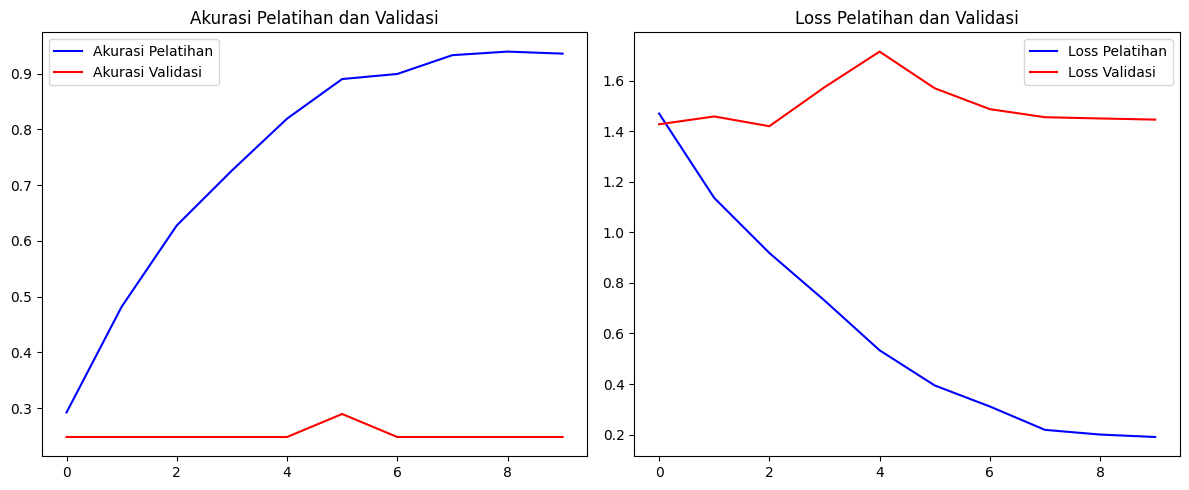

In [65]:
# Ambil data akurasi dan loss dari history pelatihan
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

# Membuat figure dengan 1 baris dan 2 kolom untuk plot
plt.figure(figsize=(12, 5))

# Plot akurasi pelatihan dan validasi
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, plot pertama
plt.plot(epochs, accuracy, 'b', label='Akurasi Pelatihan')
plt.plot(epochs, val_accuracy, 'r', label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.legend()

# Plot loss pelatihan dan validasi
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, plot kedua
plt.plot(epochs, loss, 'b', label='Loss Pelatihan')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi')
plt.title('Loss Pelatihan dan Validasi')
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report

# 1. Definisikan test_flow terlebih dahulu
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi pixel

test_flow = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset_parfum',  # Path ke folder test
    target_size=(224, 224),  # Sesuaikan dengan ukuran input model
    batch_size=64,
    class_mode='categorical',
    shuffle=False  # Penting untuk evaluasi
)

# 2. Baru lakukan prediksi
y_pred = model.predict(test_flow)
y_pred_classes = np.argmax(y_pred, axis=1)

# 3. Dapatkan label sebenarnya
y_true = test_flow.classes
class_labels = list(test_flow.class_indices.keys())

# 4. Tampilkan laporan klasifikasi
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

Found 1217 images belonging to 4 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 451ms/step
                      precision    recall  f1-score   support

Parfum botol plastik       0.00      0.00      0.00       300
         Parfum roll       0.00      0.00      0.00       312
 Parfum spray  logam       0.00      0.00      0.00       305
         Rarfum kaca       0.25      1.00      0.40       300

            accuracy                           0.25      1217
           macro avg       0.06      0.25      0.10      1217
        weighted avg       0.06      0.25      0.10      1217



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


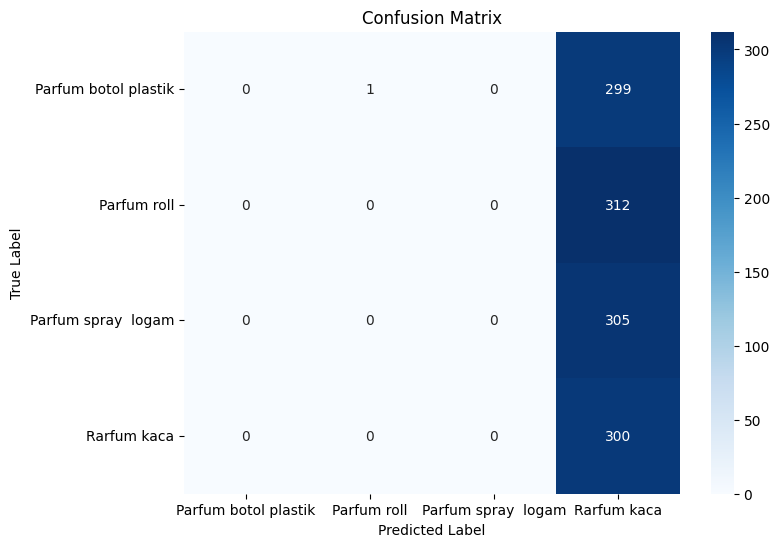

In [68]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


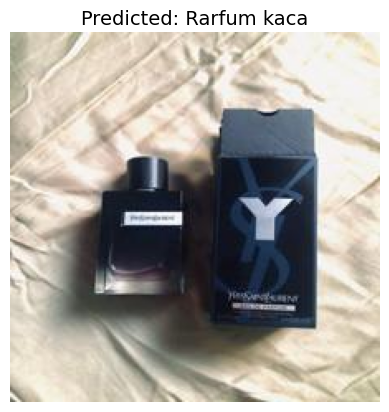

In [70]:
from tensorflow.keras.preprocessing import image

# Fungsi prediksi gambar baru
def predict_new_image(img_path, model, target_size=(224, 224), class_indices=None):
    # Load dan preprocess gambar
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimensi

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    # Mapping index ke nama kelas
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class_name = class_labels[predicted_class_index]

    # Tampilkan hasil
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class_name}', fontsize=14)
    plt.axis('off')
    plt.show()

# Contoh penggunaan - ganti path dengan gambar barumu
new_image_path = '/content/drive/MyDrive/Dataset_parfum/Parfum Kaca/IMG_8684.jpg'
predict_new_image(new_image_path, model, target_size=(224, 224), class_indices=test_flow.class_indices)